In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [174]:
df_s1 = pandas.read_csv('20L1024N50D_relu_0723_s1.log')

In [209]:
df_s1p2 = pandas.read_csv('20L1024N50D_relu_0723_s1p2.log')
df = df_s1.append(df_s1p2, ignore_index=True)
df.tail(n=10)

,epoch,Le,Ljet,Lmu,acc,loss,sLe,sLjet,sLmu,val_Le,val_Ljet,val_Lmu,val_acc,val_loss,val_sLe,val_sLjet,val_sLmu
333,333,0.201072,0.168932,0.040549,0.927110,1.126830,0.201072,0.844659,0.081098,0.250876,0.139778,0.038527,0.936492,1.026822,0.250876,0.698892,0.077054
334,334,0.208462,0.161364,0.042689,0.926761,1.100661,0.208462,0.806821,0.085378,0.190362,0.136495,0.032455,0.943061,0.937747,0.190362,0.682476,0.064910
335,335,0.204553,0.159864,0.041006,0.928188,1.085883,0.204553,0.799318,0.082012,0.249055,0.234653,0.036820,0.879084,1.495959,0.249055,1.173263,0.073640
336,336,0.198495,0.161889,0.046210,0.927032,1.100359,0.198495,0.809443,0.092421,0.496209,0.199682,0.226214,0.801068,1.947045,0.496209,0.998408,0.452428
337,337,0.197747,0.157607,0.043457,0.931307,1.072696,0.197747,0.788034,0.086915,0.184303,0.135045,0.031370,0.950595,0.922268,0.184303,0.675223,0.062741
338,338,0.203204,0.161715,0.041638,0.928590,1.095053,0.203204,0.808574,0.083275,1.552813,0.643996,2.312885,0.586063,9.398564,1.552813,3.219982,4.625770
339,339,0.195172,0.172449,0.043432,0.927975,1.144282,0.195172,0.862246,0.086864,0.322731,0.163887,0.106950,0.868291,1.356067,0.322731,0.819436,0.213900
340,340,0.208754,0.156263,0.040573,0.930857,1.071214,0.208754,0.781314,0.081146,0.287585,0.168924,0.038693,0.892620,1.209594,0.287585,0.844622,0.077386
341,341,0.196252,0.155157,0.038133,0.929968,1.048302,0.196252,0.775784,0.076266,0.212358,0.144908,0.034560,0.923234,1.006018,0.212358,0.724540,0.069119
342,342,0.191928,0.152488,0.042785,0.925910,1.039936,0.191928,0.762438,0.085570,0.836947,0.279144,0.370411,0.752833,2.973489,0.836947,1.395721,0.740821


In [3]:
losses = [ ("loss", "Total loss"), ("Le", "Loss tau vs. e"), ("Lmu", "Loss tau vs. mu"), ("Ljet", "Loss tau vs. jet")]
losses_and_acc = losses + [ ("acc", "Accuracy") ]

In [210]:
best_idx = set()
for loss in losses_and_acc:
    loss_name = loss[0]
    val_loss_name = "val_" + loss_name
    if loss_name != "acc":
        idx = df[val_loss_name].idxmin()
    else:
        idx = df[val_loss_name].idxmax()
    best_idx.add(idx)
    print("{: <20}{: <7}{:.6f}".format(loss_name, df.epoch[idx], df[val_loss_name][idx]))
df.iloc[sorted(list(best_idx))]

loss                298    0.439104
Le                  213    0.087676
Lmu                 289    0.030615
Ljet                276    0.050353
acc                 337    0.950595


,epoch,Le,Ljet,Lmu,acc,loss,sLe,sLjet,sLmu,val_Le,val_Ljet,val_Lmu,val_acc,val_loss,val_sLe,val_sLjet,val_sLmu
213,213,0.095506,0.085851,0.071539,0.888827,0.667839,0.095506,0.429254,0.143079,0.087676,0.059427,0.052525,0.888258,0.489859,0.087676,0.297133,0.105050
276,276,0.169789,0.074172,0.054026,0.892451,0.648700,0.169789,0.370860,0.108051,0.144351,0.050353,0.037906,0.900437,0.471929,0.144351,0.251766,0.075811
289,289,0.117653,0.079235,0.049111,0.901411,0.612051,0.117653,0.396176,0.098222,0.109578,0.057169,0.030615,0.916217,0.456653,0.109578,0.285846,0.061229
298,298,0.127716,0.064356,0.055996,0.890048,0.561491,0.127716,0.321782,0.111993,0.113493,0.050807,0.035788,0.913126,0.439104,0.113493,0.254035,0.071576
337,337,0.197747,0.157607,0.043457,0.931307,1.072696,0.197747,0.788034,0.086915,0.184303,0.135045,0.031370,0.950595,0.922268,0.184303,0.675223,0.062741


In [5]:
def std_abs_rel(x, win_size):
    rol = x.rolling(win_size, min_periods=2)
    return rol.std(), rol.std() / rol.mean()

In [6]:
def direction(y, win_size):
    dirs = np.empty(len(y))
    dirs[:] = np.nan
    x = np.arange(win_size)
    y_rol = y.rolling(win_size, min_periods=1).mean()
    for n in range(len(y)):
        first_entry = max(0, n + 1 - win_size)
        n_entries = n - first_entry + 1
        if n_entries > 1:
            p = np.polyfit(x[0:n_entries], y_rol[first_entry:first_entry+n_entries], 1)
            dirs[n] = p[0]
    return dirs

In [93]:
steps_per_epoch = 6
win_size = steps_per_epoch * 5

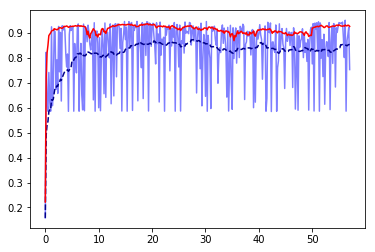

In [211]:
x_values = df.epoch / steps_per_epoch
plt.plot(x_values, df.val_acc, color="blue", alpha=0.5)
plt.plot(x_values, df.val_acc.rolling(win_size, min_periods=1).mean(), color="darkblue", ls="--")
plt.plot(x_values, df.acc, color="red");

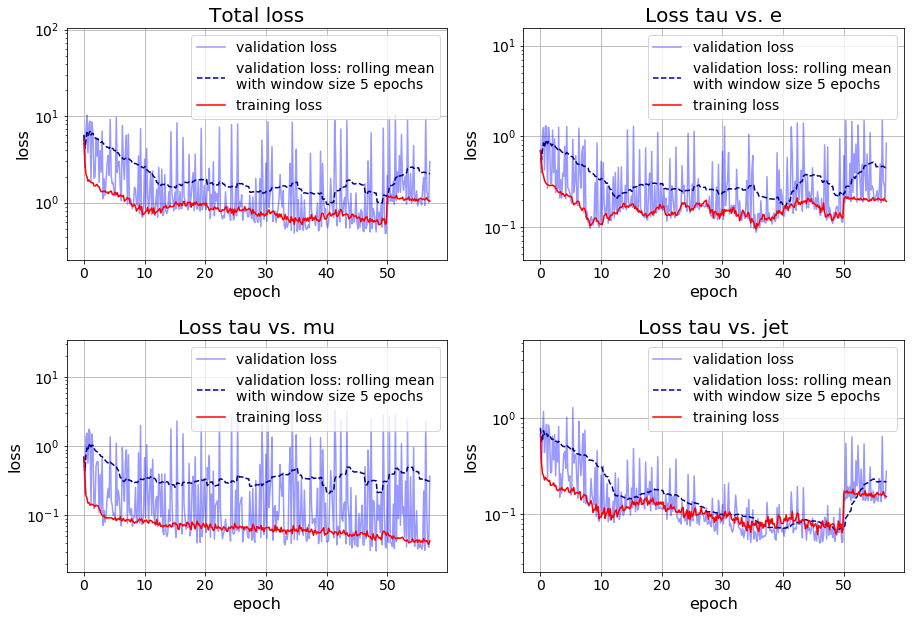

In [212]:
fig, all_ax = plt.subplots(2, 2, figsize=(15,10))
i = 0
x_values = df.epoch / steps_per_epoch
for loss in losses:
    loss_name = loss[0]
    loss_title = loss[1]
    j = int((i - (i % 2)) / 2)
    k = i % 2
    ax = all_ax[j][k]
    val_loss = df["val_" + loss_name]
    val_loss_rol = df["val_" + loss_name].rolling(win_size, min_periods=1).mean()
    train_loss = df[loss_name]
    ax.plot(x_values, val_loss, color="blue", alpha=0.4)
    ax.plot(x_values, val_loss_rol, color="darkblue", ls="--")
    ax.plot(x_values, train_loss, color="red")
    
    n_epoch = df.shape[0]
    half_epoch = int(n_epoch * 0.4)
    right_y_max = np.stack([val_loss[half_epoch:], val_loss_rol[half_epoch:], train_loss[half_epoch:]]).max()
    y_min = np.stack([val_loss, val_loss_rol, train_loss]).min() / 2
    
    ylim = ax.get_ylim()
    y_max = max(ylim[1], right_y_max * 10)
    ax.set_ylim([y_min, y_max])
    ax.legend(["validation loss", "validation loss: rolling mean\nwith window size %d epochs" % (win_size / steps_per_epoch),
               "training loss"], fontsize=14, loc='upper right')
        
    ax.set_title(loss_title, fontsize=20)
    ax.set_ylabel("loss", fontsize=16)
    ax.set_xlabel("epoch", fontsize=16)
    ax.tick_params(labelsize=14, )
    ax.set_yscale('log')
    ax.grid(True)
    
    i += 1
plt.subplots_adjust(hspace=0.35)
plt.show()
fig.savefig("Losses.pdf", bbox_inches='tight')

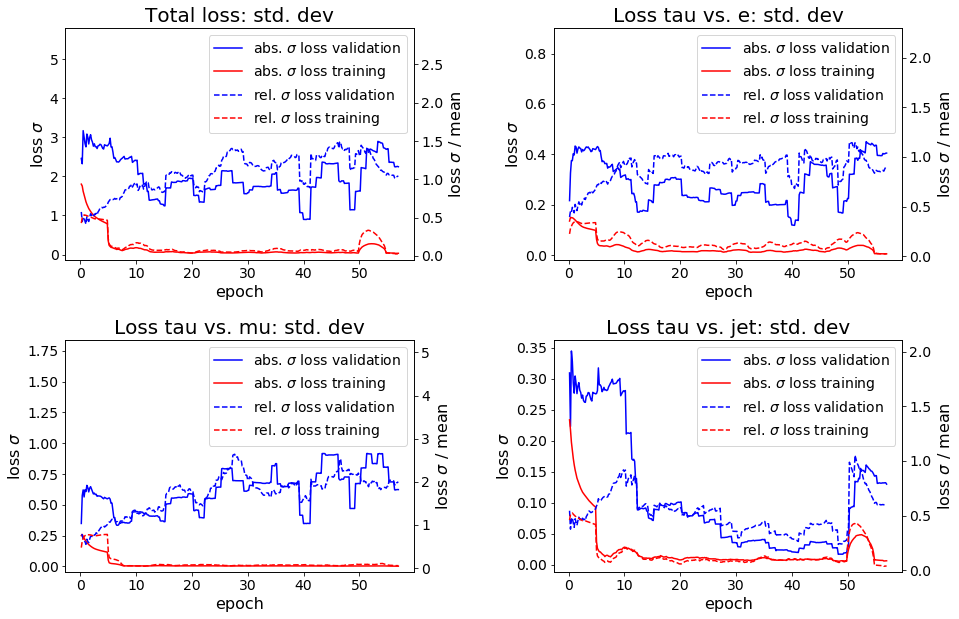

In [213]:
fig, all_ax = plt.subplots(2, 2, figsize=(15,10))
i = 0
for loss in losses:
    loss_name = loss[0]
    loss_title = loss[1]
    j = int((i - (i % 2)) / 2)
    k = i % 2
    ax = all_ax[j][k]
    val_std = std_abs_rel(df["val_" + loss_name], win_size)
    train_std = std_abs_rel(df[loss_name], win_size)
    
    l1 = ax.plot(x_values, val_std[0], color="blue")
    l2 = ax.plot(x_values, train_std[0], color="red")
    
    ax_twin = ax.twinx()
    
    l3 = ax_twin.plot(x_values, val_std[1], color="blue", ls="--")
    l4 = ax_twin.plot(x_values, train_std[1], color="red", ls="--")
    
    n_epoch = df.shape[0]
    half_epoch = int(n_epoch * 0.4)
    right_y_max = np.stack([val_std[0][half_epoch:], train_std[0][half_epoch:]]).max()
    ylim = ax.get_ylim()
    y_max = max(ylim[1], right_y_max * 2)
    ax.set_ylim([ylim[0], y_max])
    
    right_y_max = np.stack([val_std[1][half_epoch:], train_std[1][half_epoch:]]).max()
    ylim = ax_twin.get_ylim()
    y_max = max(ylim[1], right_y_max * 2)
    ax_twin.set_ylim([ylim[0], y_max])

    lines = l1 + l2 + l3 + l4
    ax.legend(lines, ["abs. $\sigma$ loss validation", "abs. $\sigma$ loss training",
                      "rel. $\sigma$ loss validation", "rel. $\sigma$ loss training"], fontsize=14)

    
    ax.set_title(loss_title + ": std. dev", fontsize=20)
    ax.set_ylabel("loss $\sigma$", fontsize=16)
    ax.set_xlabel("epoch", fontsize=16)
    ax.tick_params(labelsize=14)
    
    ax_twin.set_ylabel("loss $\sigma$ / mean", fontsize=16)
    ax_twin.tick_params(labelsize=14)
    i += 1
    
plt.subplots_adjust(hspace=0.35, wspace=0.4)
plt.show()
fig.savefig("Loss_std.pdf", bbox_inches='tight')

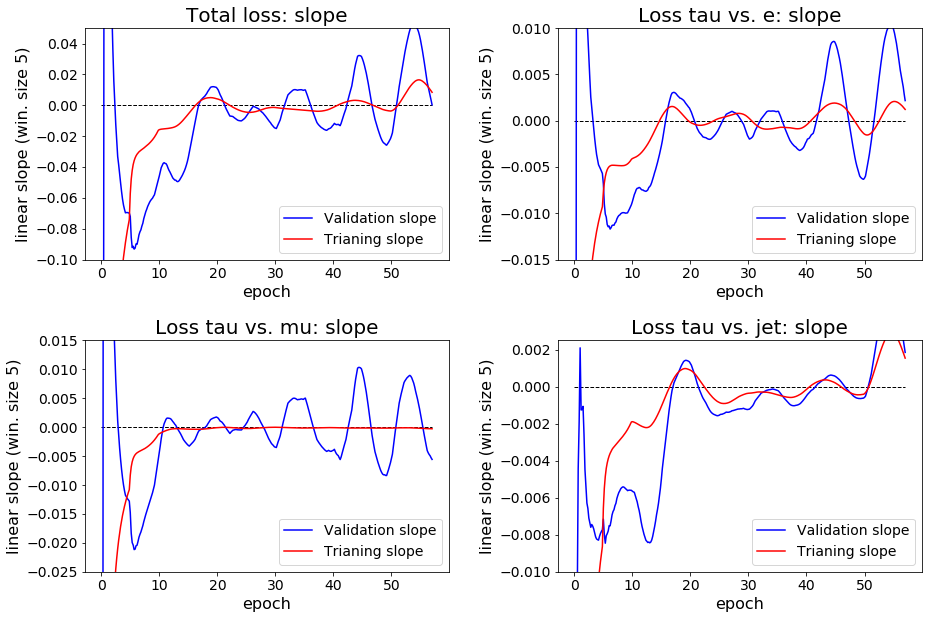

In [214]:
f, all_ax = plt.subplots(2, 2, figsize=(15,10))
y_ranges = [[-0.1, 0.05], [-0.015, 0.01], [-0.025, 0.015], [-0.01, 0.0025]]
i = 0
for loss in losses:
    loss_name = loss[0]
    loss_title = loss[1]
    j = int((i - (i % 2)) / 2)
    k = i % 2
    ax = all_ax[j][k]
    ax.plot(x_values, np.zeros(df.shape[0]), color="black", linewidth=1, ls="--")
    l1 = ax.plot(x_values, direction(df["val_" + loss_name], win_size), color="blue")
    l2 = ax.plot(x_values, direction(df[loss_name], win_size), color="red")
    
    lines = l1 + l2
    ax.legend(lines, ["Validation slope", "Trianing slope"], fontsize=14, loc='lower right')
    
    ax.set_title(loss_title + ": slope", fontsize=20)
    ax.set_ylabel("linear slope (win. size %d)" % (win_size / steps_per_epoch), fontsize=16)
    ax.set_xlabel("epoch", fontsize=16)
    ax.tick_params(labelsize=14)
    ax.set_ylim(y_ranges[i])
    
    i += 1
plt.subplots_adjust(hspace=0.35, wspace=0.3)
plt.show()
fig.savefig("Slops.pdf", bbox_inches='tight')

In [18]:
6e7/(10*(172+4))/1024

33.29190340909091

In [19]:
4*1e4*172

6880000.0

In [421]:
6e3

6000.0

In [423]:
(1e-5-1e-7)/(1e-7* 2*60000)

0.000825

In [443]:
arr = np.arange(90).reshape((30, 3))
np.random.shuffle(arr[0:10, :])
arr

array([[15, 16, 17],
       [12, 13, 14],
       [27, 28, 29],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [24, 25, 26],
       [ 0,  1,  2],
       [21, 22, 23],
       [ 9, 10, 11],
       [18, 19, 20],
       [30, 31, 32],
       [33, 34, 35],
       [36, 37, 38],
       [39, 40, 41],
       [42, 43, 44],
       [45, 46, 47],
       [48, 49, 50],
       [51, 52, 53],
       [54, 55, 56],
       [57, 58, 59],
       [60, 61, 62],
       [63, 64, 65],
       [66, 67, 68],
       [69, 70, 71],
       [72, 73, 74],
       [75, 76, 77],
       [78, 79, 80],
       [81, 82, 83],
       [84, 85, 86],
       [87, 88, 89]])

In [449]:
30*12/60

6.0

In [483]:
check = pandas.Series([1, 2, 3])

In [485]:
(check ** 2).sum()

14